In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
df_train = pd.read_csv('SVM-data/data/fashion-mnist_small_train.csv')
df_test = pd.read_csv('SVM-data/data/fashion-mnist_small_test.csv')

In [5]:
df_train.shape

(9000, 785)

In [6]:
df_test.shape

(10000, 784)

In [7]:
df_train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,116,120,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,96,67,0,0,1,0,0,0,0,0


In [8]:
X_train = df_train.drop(['label'], axis=1).values
y_train = df_train[['label']].values.ravel()

In [9]:
X_test = df_test.values

<font color=red> provide a understandable name for label </font>

In [10]:
label_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

<font color=red> Plot images of data </font>

In [11]:
def plot_image(vector_input):
    size = 28
    image = vector_input.reshape(size,size)
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.show()

This image is Sandal


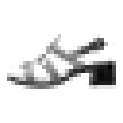

In [12]:
i=10
print('This image is %s' % label_dict[y_train[i]])
plot_image(X_train[i])

This image is Ankle boot


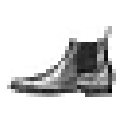

In [13]:
i=100
print('This image is %s' % label_dict[y_train[i]])
plot_image(X_train[i])

<font color=red> SVM </font>

**Predictor**:
\begin{align}
p_c({x}) = c_0 + c_1k(x,x^{(1)}) + \dots + c_Mk(x,x^{(M)})
\end{align}

**Loss function**:
\begin{align}
L(c) = \sqrt{c_1^2 + c_2^2 + \dots + c_M^2} + C\sum_{i=1}^M\max(0, 1-y^{(i)}c^TK(x^{(i)}))
\end{align}
where
$
K(x^{(i)}) = (1, k(x^{(1)}, x^{(i)}), \dots, k(x^{(M)}, x^{(i)}))^T
$

**Meaning of kernel name in SVC package:**

1. `kernel='linear'`: linear case
2. `kernel='ploynomial'`: $k(x,x') = ({\rm gamma}<x,x'> + {\rm coef0})^{\rm degree}$
3. `kernel='rbf'`: $k(x,x') = \exp(-{\rm gamma}\|x-x'\|^2)$, <font color=red>gamma here should > 0</font>
4. `kernel='sigmoid'`: $k(x, x') = \tanh({\rm gamma}<x,x'>+{\rm coef0})$

<font color=red> Initilaize SVC </font>

In [14]:
from sklearn.svm import SVC

In [16]:
#linear kernel
mySVM = SVC(kernel='linear', C=0.5)
# polynomial
# mySVM = SVC(???)
# rbf kernel
# mySVM = SVC(???)
# sigmoid kernel
# mySVM = SVC(???)

<font color=red> Train SVC  </font>

In [20]:
mySVM.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# # Use GridCV to tune parameters
# tuned_parameters = {'C': [0.1, 0.5, 1]}
# from sklearn.model_selection import GridSearchCV
# _mySVM = SVC()
# mySVM = GridSearchCV(_mySVM, tuned_parameters , cv=3,
#                       scoring='roc_auc'
#                       verbose=10,
#                       n_jobs=4)
# mySVM.fit(X_train, y_train)

<font color=red> Predict test labels </font>

In [22]:
y_pred = mySVM.predict(X_test)

<font color=red> Evaluation <font>

<font color=green> Load real labels </font>

In [23]:
y_real = pd.read_csv('SVM-data/data/fashion-mnist_small_test-labels.csv').values.ravel()

<font color=green> Quick validation </font>

Predict label: Shirt
Real label: T-shirt/top


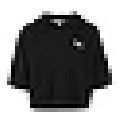

In [24]:
i=103
print('Predict label:' , label_dict[y_pred[i]])
print('Real label:', label_dict[y_real[i]])
plot_image(X_test[i])

<font color=red> Accuracy </font>

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_real, y_pred)

0.8038

<font color=red>Micro-Average ROC curve </font></font>

<font color=green> y_score</font>

In [26]:
y_score = mySVM.decision_function(X_test)

<font color=green> Binarize real labels </font>

In [27]:
from sklearn.preprocessing import label_binarize
y_real_bi = label_binarize(y_real, classes=range(10))

In [28]:
y_real_bi

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

<font color=green> fpt, tpr micro </font>

In [29]:
from sklearn.metrics import roc_curve
fpr_micro, tpr_micro, threshold_micro = roc_curve(y_real_bi.ravel(),
                                                  y_score.ravel())

<font color=green> Micro AUC</font>

In [30]:
from sklearn.metrics import auc
auc_micro = auc(fpr_micro, tpr_micro)
auc_micro

0.97088427

<font color=green> Plot Micro-Average ROC curve </font>

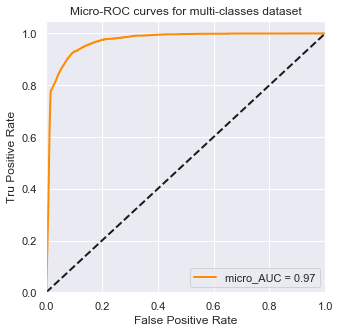

In [42]:
plt.figure(figsize=(5,5))
sns.set()
colors = ['red', 'darkorange', 'cornflowerblue']
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2,
         label='micro_AUC = {0:0.2f}' ''.format(auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Positive Rate')
plt.title('Micro-ROC curves for multi-classes dataset')
plt.legend(loc='lower right')
plt.show()

<font color=red>Macro-Average ROC curve </font>

<font color=green>fpr, tpr for each single class</font>

In [37]:
n_classes=10
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_real_bi[:, i], y_score[:, i])

<font color=green> macro fpr, tpr </font>

In [38]:
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(10)]))

In [39]:
fpr_macro.shape

(1537,)

In [44]:
from scipy import interp
sum_tpr = np.zeros_like(fpr_macro)
for i in range(n_classes):
    sum_tpr += interp(fpr_macro, fpr[i], tpr[i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  after removing the cwd from sys.path.


In [45]:
tpr_macro = sum_tpr/n_classes

<font color=green> Macro AUC </font>

In [46]:
from sklearn.metrics import auc
auc_macro = auc(fpr_macro, tpr_macro)
auc_macro

0.9659080666666666

<font color=green> Plot Macro-Average ROC curve </font>

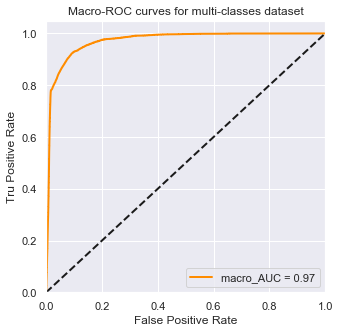

In [47]:
plt.figure(figsize=(5,5))
sns.set()
colors = ['red', 'darkorange', 'cornflowerblue']
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2,
         label='macro_AUC = {0:0.2f}' ''.format(auc_macro))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Positive Rate')
plt.title('Macro-ROC curves for multi-classes dataset')
plt.legend(loc='lower right')
plt.show()